In [ ]:
import torch
from torchvision import datasets

In [ ]:
data_path = './datasets/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./datasets/cifar-10-python.tar.gz to ./datasets/
Files already downloaded and verified


In [ ]:
from torchvision import transforms

In [ ]:
tensor_cifar10 = datasets.CIFAR10(
    data_path,
    train=True,
    download=False,
    transform=transforms.ToTensor())

In [ ]:
import matplotlib.pyplot as plt

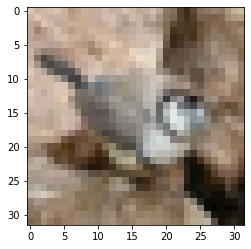

In [ ]:
img_t, _ = tensor_cifar10[90]
plt.imshow(img_t.permute(1, 2, 0))

plt.show()

In [ ]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)

In [ ]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [ ]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [ ]:
transformed_cifar10 = datasets.CIFAR10(
  data_path,
  train=True,
  download=False,
  transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2470, 0.2435, 0.2616))
]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


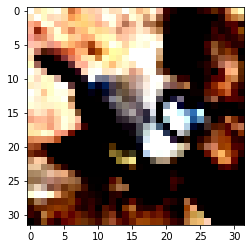

In [ ]:
img_t, _ = transformed_cifar10[90]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [ ]:
preprocess = transforms.Compose([
  transforms.ToTensor()
])

In [ ]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']

cifar2 = [(preprocess(img), label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(preprocess(img), label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [ ]:
n_out = 2
model = torch.nn.Sequential(
    torch.nn.Linear(
        3072,
        512,
    ),
    torch.nn.Tanh(),
    torch.nn.Linear(
        512,
        n_out,
    ),
    torch.nn.LogSoftmax(dim=1)
)

In [ ]:
model

Sequential(
  (0): Linear(in_features=3072, out_features=512, bias=True)
  (1): Tanh()
  (2): Linear(in_features=512, out_features=2, bias=True)
  (3): Softmax(dim=1)
)

In [ ]:
import torchvision.transforms.functional

In [ ]:
img_batch = preprocess(img).view(-1).unsqueeze(0)

In [ ]:
out = model(img_batch)

out

tensor([[0.5675, 0.4325]], grad_fn=<SoftmaxBackward0>)

In [ ]:
_, index = torch.max(out, dim=1)
index

tensor([0])

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [ ]:
learning_rate = 1e-2
model = torch.nn.Sequential(
  torch.nn.Linear(3072, 512),
  torch.nn.Tanh(),
  torch.nn.Linear(512, 2),
  torch.nn.LogSoftmax(dim=1)
)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.NLLLoss()
n_epochs = 150

for epoch in range(n_epochs):
  for imgs, labels in train_loader:
    batch_size = imgs.shape[0]
    outputs = model(imgs.view(batch_size, -1))
    loss = loss_fn(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 149, Loss: 0.465898


In [ ]:
val_loader = torch.utils.data.DataLoader(
    cifar2_val,
    batch_size=64,
    shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    batch_size = imgs.shape[0]

    outputs = model(imgs.view(batch_size, -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]

    correct += int((predicted == labels).sum())

print("Accuracy: %f", correct / total)


Accuracy: %f 0.8415


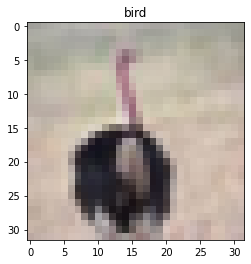

In [ ]:
img_t, label = cifar2[55]
plt.imshow(img_t.permute(1, 2, 0))
plt.title(class_names[label])
plt.show()

In [118]:
out = model(img_t.view(1, -1))

tensor([[-0.1041, -2.3136]], grad_fn=<LogSoftmaxBackward0>)

In [ ]:
_, index = torch.max(out, dim=1)
class_names[index]

'bird'

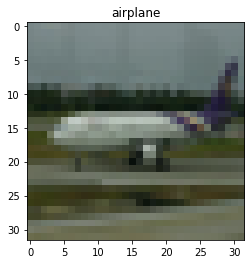

In [114]:
img_t, label = cifar2[40]
plt.imshow(img_t.permute(1, 2, 0))
plt.title(class_names[label])
plt.show()

In [117]:
out = model(img_t.view(1, -1))

tensor([[-0.1041, -2.3136]], grad_fn=<LogSoftmaxBackward0>)

In [116]:
_, index = torch.max(out, dim=1)
class_names[index]

'airplane'